Run this notebook after running the single_field.ipynb on all the fields that are sampled from a dataset. As a result, there would be csv files created for each field. One csv file contains the F1-scores for all evaluation subfields across platforms at an intersection over union (IoU) threshold of 0.5. The second csv file contains the mean F1-score (averaged over the evaluation subfields) for various IoU thresholds across platforms. These are the inputs to this notebook. The goal of this notbook is an overall comparison across all the fields, which should be representative of the entire dataset. This notebook should inform the user of the relative nuclear segmentation performance of the platforms on the particular dataset.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import skimage.io as io
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

The code below is the user's input. Input the filepaths to the csv files generated by the single_field.ipynb notebook

In [2]:
# filepaths to the csv containing the F1-scores at IoU=0.5 for the subfields
# Loading the csv files as dataframes
sixplextonsil_5IoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_5IoU_csv/6plextonsil.csv')
Tonsil7color_5IoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_5IoU_csv/Tonsil7color.csv')
TME11_5IoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_5IoU_csv/TME11.csv')
Bph2_5IoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_5IoU_csv/Bph2.csv')
VISTA4_5IoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_5IoU_csv/VISTA4.csv')

In [3]:
# filepaths to the csv containing the mean F1-scores (averaged over subfields) at various IoUs
# Loading the csv files as dataframes
sixplextonsil_allIoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_allIoU_csv/6plextonsil.csv')
Tonsil7color_allIoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_allIoU_csv/Tonsil7color.csv')
TME11_allIoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_allIoU_csv/TME11.csv')
Bph2_allIoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_allIoU_csv/Bph2.csv')
VISTA4_allIoU_df = pd.read_csv('/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_allIoU_csv/VISTA4.csv')

In [4]:
# Providing the filepath to save generated figures
combined_5IoU_path = '/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_5IoU_plot/combined.png'

combined_allIoU_path = '/Users/abishek/Desktop/MRL/Platforms/code/nuclear_seg/F1_allIoU_plot/combined.png'

The code below is used to generate figures to evaluate and compare the platforms

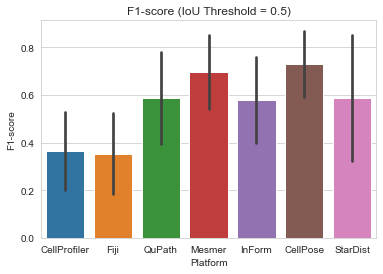

In [5]:
# Change the field names according to the names provided by the user
# Concatenating the dataframes into one big dataframe
combined_5IoU_df = pd.concat([TME11_5IoU_df, Bph2_5IoU_df, VISTA4_5IoU_df, sixplextonsil_5IoU_df, Tonsil7color_5IoU_df])
F1_barplot_combined = sns.barplot(combined_5IoU_df, errorbar='sd')
F1_barplot_combined.set(xlabel ="Platform", ylabel = "F1-score", title ='F1-score (IoU Threshold = 0.5)')
plt.savefig(combined_5IoU_path, dpi=500)

/var/folders/tb/t9xd8_k12c79sjm8cjqmr_x80000gn/T/ipykernel_60982/905297914.py:5: UserWarning: 
The markers list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  combined_F1_lineplot = sns.lineplot(data=combined_allIoU_df, dashes=False, markers='s', legend=True)


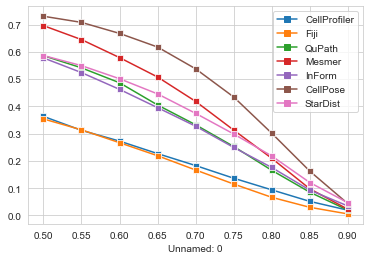

In [6]:
# Change the field names according to the names provided by the user
# Concatenating the dataframes into one big dataframe
combined_allIoU_df = (TME11_allIoU_df + Bph2_allIoU_df + VISTA4_allIoU_df + sixplextonsil_allIoU_df + Tonsil7color_allIoU_df)/5
combined_allIoU_df = combined_allIoU_df.set_index('Unnamed: 0')
combined_F1_lineplot = sns.lineplot(data=combined_allIoU_df, dashes=False, markers='s', legend=True)
plt.savefig(combined_allIoU_path, dpi=500)